## Find all the 9s!

In this section you should build up a classiﬁer that can distinguish number 9 from every other numbers. (reusing code and libraries are ok as long as you explain what is going on) For each section below you need to measure your performance. So, make sure to run the performance check at every part.
1. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).
2. Find the 9s using Decision tree.
3. Find the 9s using Random Forests.





-----------------------------------------------------------------------------------------------------

A Binary Classifier is an instance of Supervised Learning. In Supervised Learning we have a set of input data and a set of labels, our task is to map each data with a label. 



A Binary Classifier classifies elements into two groups, either Zero or One. In our case, we have 10 labels, so we need to build a new clasification 

1. Every record thats 9 --> will have label 0 
2. Every record that is not 9 --> will have label 1 


## Import Data and Libraries 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import pandas as pd
import numpy as np 
import random 
import matplotlib.pyplot as plt

##silence future warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
mnist_data = pd.read_csv(r'C:\Temp\mnist\train.csv',nrows=40000) 

In [3]:
mnist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39700 entries, 0 to 39699
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 237.8 MB


In [4]:
mnist_data.describe() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,39700.000000,39700.0,39700.0,39700.0,39700.0,39700.0,39700.0,39700.0,39700.0,39700.0,...,39700.000000,39700.000000,39700.000000,39700.000000,39700.000000,39700.000000,39700.0,39700.0,39700.0,39700.0
mean,4.459370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.221738,0.117204,0.061940,0.021360,0.018237,0.003023,0.0,0.0,0.0,0.0
std,2.887922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.330270,4.594907,3.366489,1.810125,1.948600,0.426095,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
set(mnist_data['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

there are 10 labels - in this first problem, we are going to build a classifier that can classify a number of being 9 or not 9 ( binary classifier ) 

In [4]:
#drop the label 
X=mnist_data.drop('label',1)
y=mnist_data['label']

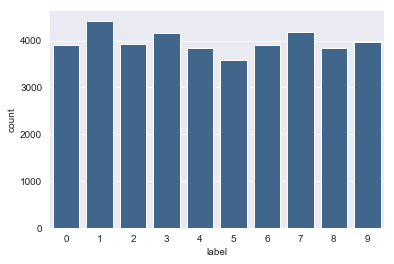

In [9]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='label', data=mnist_data,color=(0.2, 0.4, 0.6, 0.6))

See in the plot above, the categories are pretty uniformily distributed 

### first let's create 2 buckets to train our binamy classification - 
#### Label9=0 or LabelNot9=1

In [5]:

y1 = (y <= 8).astype(int)
print ("We have a set with the 2 labels in our MNIST Data set\n",set(y1))

We have a set with the 2 labels in our MNIST Data set
 {0, 1}


In [8]:
y1.values

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
count_y1=[]
for i in range(2):
    add_count=np.count_nonzero(y1==i)    
    count_y1.append(add_count)

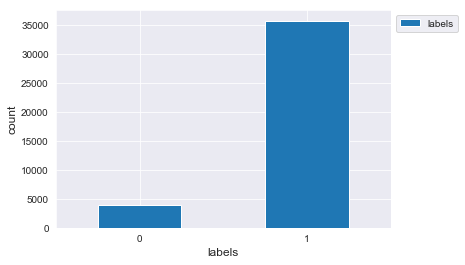

In [47]:
index = ['0', '1']
df = pd.DataFrame({'labels': count_y1}, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel(r"count", fontsize = 12)
plt.xlabel(r"labels", fontsize = 12)

plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.show()


###  KNNeighborsClassifier for Minkowski= 1,2,3 . Binary Classification


We are going to train our model with y1 ( instead of y ) since y1 contains our binary classification. 

In [6]:
#split the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(
    X, y1, test_size=0.2, random_state=1000
)

In [15]:
KNN_1 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=1, metric='minkowski')
KNN_1.fit(X_train, y1_train)

KNN_2 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2, metric='minkowski')
KNN_2.fit(X_train, y1_train)

#KNN_3 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=3, metric='minkowski')
#KNN_3.fit(X_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
scoreKNN_1=KNN_1.score(X_test, y1_test)
print("Accuracy Model KNN Minkowski with p=1",scoreKNN_1)

Accuracy Model KNN Minkowski with p=1 0.988287153652393


In [17]:
y_pred_KNN_1=KNN_1.predict(X_test)

In [76]:
scoreKNN_2=KNN_2.score(X_test, y1_test)
print("Accuracy Model KNN Minkowski with p=2",scoreKNN_2)

Accuracy Model KNN Minkowski with p=2 0.9889168765743073


In [ ]:
y_pred_KNN_2=KNN_2.predict(X_test)

In [ ]:
scoreKNN_3=KNN_3.score(X_test, y1_test)
print("Accuracy Model KNN Minkowski with p=3",scoreKNN_3)

In [ ]:
y_pred_KNN_3=KNN_3.predict(X_test)

### Random Forest Classifier for binary classification


In [7]:
# Run Random Forest classifer  

RFC=RandomForestClassifier()
RFC.fit(X_train,y1_train)
accuracy_RFC_2 = RFC.score(X_test, y1_test)
print("Accuracy of our prediction",accuracy_RFC_2)


Accuracy of our prediction 0.9802267002518892


In [8]:
y_pred_RFC=RFC.predict(X_test)

###  Decision Tree Classifier

In [9]:
# Create Decision Tree classifer object 
DTC_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DTC_2 = DTC_2.fit(X_train,y1_train)
accuracy_DTC_2 = DTC_2.score(X_test, y1_test)
# Model Accuracy, how often is the classifier correct?
print("General Accuracy of Decision Tree Classifier:",accuracy_DTC_2)

General Accuracy of Decision Tree Classifier: 0.8997481108312343


89% is pretty good, but is still lower than the other classifiers when it comes to differentiate between 9s ( labeled as 1 ) and others ( labeled as 0s )

In [10]:

depth = np.linspace(1, 20, 20, endpoint=True)
accuracy_DTC_2 =[]

for i in depth:
    DCT_d = DecisionTreeClassifier(max_depth=i)
    DCT_d.fit(X_train, y1_train)
    score_i = DCT_d.score(X_test, y1_test)
    accuracy_DTC_2.append(score_i)

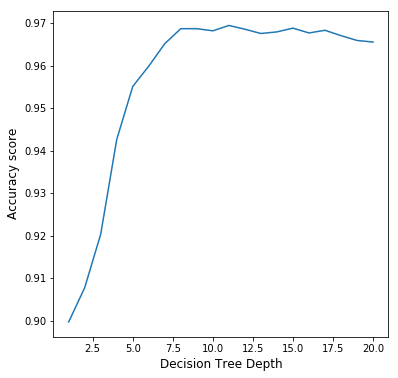

In [12]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

fig = plt.figure(figsize=(6, 6))

plt.plot(depth, accuracy_DTC_2)

plt.xlabel(r"Decision Tree Depth", fontsize = 12)
plt.ylabel(r"Accuracy score", fontsize = 12)

plt.show()


#### So the decision tree peaks at around depth=8.
#### Lets run the classifier again using this parameter

In [13]:
# Create Decision Tree classifer object 
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=8)
# Train Decision Tree Classifer
DTC = DTC.fit(X_train,y1_train)
accuracy_DTC_8 = DTC.score(X_test, y1_test)
print("General Accuracy of Decision Tree Classifier:",accuracy_DTC_8)

General Accuracy of Decision Tree Classifier: 0.954911838790932


Yay, 95% - This is better. It jumped 6 points just by adjusting the depth level. 

In [14]:
y_pred_DTC=DTC.predict(X_test)

#### Just to summarize what we have done so far : 

##### 1. Re-labeled the data to have 2 categories : "9" and "not 9" . 
##### 2. Run classifiers KNN ( for Mikownski=1,2,3)  Random Forest and Decision tree that are accurate to find the right label in the following percentages 


Note for Abtin : My processor was short on memory everytime I tried p=3. It would run it for hours until I interrupt the kernel... So for that reason is not included in the results. 


In [22]:
model_names=['Decision Tree Classifier 2 Labels',
             'RandomForestClassifier 2 labels',
             'KNN Minkowski p=1 2 Labels'#,
             #'KNN Minkowski p=2 2 Labels'
            ]
acc=[format(accuracy_DTC_8*100,'.2f'),format(accuracy_RFC_2*100,'.2f'),format(scoreKNN_1*100,'.2f')]
d={}

d={'Modelling Algorithm':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame



,Modelling Algorithm,Accuracy
0,Decision Tree Classifier 2 Labels,95.49
1,RandomForestClassifier 2 labels,98.02
2,KNN Minkowski p=1 All Digits,98.83



It looks like the accuracy of "getting the right label " is pretty high across all the different algorithms.

Lets visualize the predictions using a few rows of the testing set 

And after that, we are going to evaluate how accurate is each algorithm in "finding the 9s" especifically 

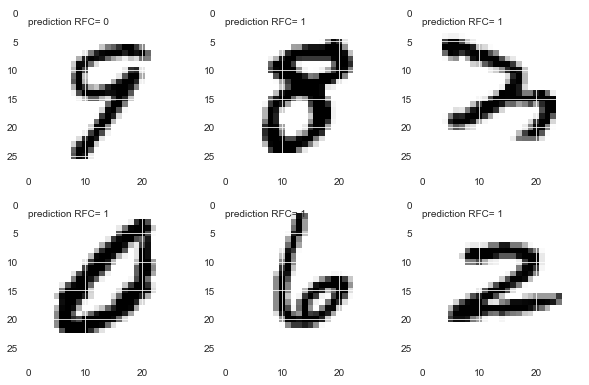

In [75]:
import matplotlib as mpl
plt.figure(figsize=(10, 10))

j = 331
for i in range(0,6):
    example= X_test.iloc[i].values
    example=example.reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction RFC= {}".format(y_pred_RFC[i]))
    j+=1

plt.show()

#### As we can see, the digit =9 has a prediction of label 0 ( which is what we marked as label 9 ). 
#### All the others digits are predicted with label=1 ( non 9s ) 



### Finally, we are going to plot the results in a Confusion Matrix to evaluate how accurate our algorithms are to find 9s in our data set 

Confusion matrix
[[ 614  182]
 [ 176 6968]]


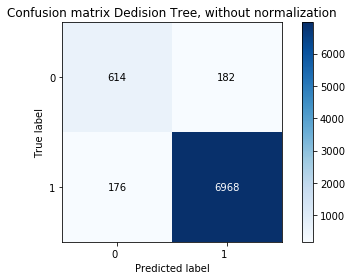

In [23]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = unique_labels(y1_test)
y_pred_DTC=DTC.predict(X_test)

def plot_confusion_matrix(a_test, a_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(a_test, a_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(a_test, a_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y1_test, y_pred_DTC, classes=class_names,
                      title='Confusion matrix Dedision Tree, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y, y_pred, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

#### In this example above we can see that : 

#### Decision Tree algorithm finds the "9s" with an accuracy of 77% =614/(614+182)

#### Lets plot the matrix for the other algorithms  

#### Random Forest 

Confusion matrix
[[ 684  112]
 [  47 7097]]


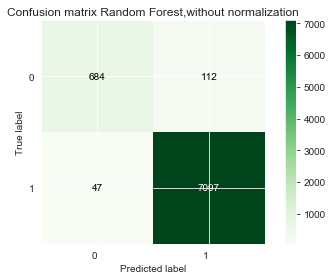

In [91]:
# Plot non-normalized confusion matrix

plot_confusion_matrix(y1_test, y_pred_RFC, classes=class_names,
                      title='Confusion matrix Random Forest,without normalization',
                      cmap=plt.cm.Greens)
plt.show()

#### In this example we can see that : 

#### Random Forest algorithm finds the "9s" with an accuracy of 85.9% =684/(684+112)

#### KNNeighborsClassifier for Minkowski= 1

Confusion matrix
[[ 754   42]
 [  51 7093]]


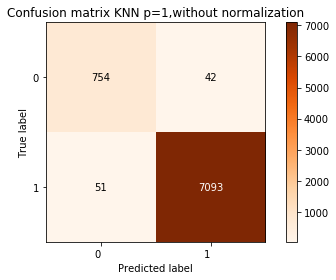

In [30]:
y_pred_KNN_1

# Plot non-normalized confusion matrix

plot_confusion_matrix(y1_test, y_pred_KNN_1, classes=class_names,
                      title='Confusion matrix KNN p=1,without normalization',
                      cmap=plt.cm.Oranges)
plt.show()


#### KNNeighborsClassifier for Minkowski= 1 finds the "9s" with an accuracy of 94.7% =754/(754+42)

Thats pretty good ! 


## Find every single digits!


1. First forget about the labels and run the k-means algorithm to ﬁnd whether there is an underlying patterns. So, ﬁrst ﬁnd the k clusters (here is obviously 10 clusters). Then look at their labels and ﬁnd the accuracy. By doing this you are turning a supervised learning into an unsupervised learning!
2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).
3. Find the digits using Decision tree.
4. Find the digits using Random Forests.
5. Comment on any signiﬁcant diﬀerence between your results for the binary classiﬁer vs multi-class classiﬁers.


--------------------------------------------------------------------------

### Clustering : Forget about labels and run KMeans to find underlying patterns 

The  process of finding meaningful groups in data is called Clustering. the objective here is not to predict a target class variable, but to capture the possible natural groupings in data 


k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.



#### Import Libraries needed 

In [87]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Lets run KMeans for 10 clusters 

Aplying feature reduction techniques would speed up the process, and also improve the results. These steps are important to follow because K-Means is sensitive to outliers, just like every other algo that uses average/mean values. Following these steps alleviate these issues.

In [89]:
y_pred_KMeans = KMeans(n_clusters=10, random_state=170).fit_predict(X)

Confusion matrix
[[  32    3   26  834 2734  102    2    3    2  165]
 [   6    4    3    2    0    3 1940    2 2458    5]
 [ 140   42  124  120   26  104  249 2703  233  176]
 [ 585   25  121  335   15   26   30  106  276 2639]
 [   9 1184 2154   86    5  108  160   22  107    0]
 [ 516  134  237 1044   34   48  196    5  117 1248]
 [  12    2   45  745   55 2741   35   34  206   20]
 [  14 2474 1242    6   12    4  182   30  213    4]
 [2364  100  105  197   21   35  204   25  181  615]
 [  52 1555 2022   18   27   11   71    6  153   47]]


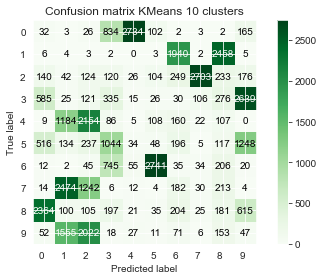

In [124]:
# Plot non-normalized confusion matrix
class_names_y=unique_labels(y)
plot_confusion_matrix(y, y_pred_KMeans, classes=class_names_y,
                      title='Confusion matrix KMeans 10 clusters',
                      cmap=plt.cm.Greens)
plt.show()

#### As we can see above, the algorithm is not identifying clear patterns about the digits in the information 
#### Let's clean up the X data . There are some columns that do not add any information 

In [102]:
# is there any duplicate 
extra = X[X.duplicated()]
print("These are no duplicate records ",extra.shape)

These are no duplicate records  (0, 784)


In [95]:
# is there any fixed features ( pixel all 0 for the entire column )
#Remove fixed features from our input dataset.

# First we make a copy of X 

X_fr=X.copy()


# we have to find a way to remember the dropped columns them later...just in case

dropped_columns = []
for column in X_fr.columns:
## lets remove the "pixel" columns equal 0 as they dont add any information 
    if X_fr[column].max() == X_fr[column].min():
        dropped_columns.append(column)   
X_fr.drop(dropped_columns, axis = 1, inplace = True) 
print('Dropped columns:', len(dropped_columns))
print('New shape of dataset:', X_fr.shape)

Dropped columns: 77
New shape of training dataset: (39700, 707)


In [105]:
Kmeans_fr = KMeans(n_clusters=10)
y_pred_KMeans_fr=Kmeans_fr.fit_predict(X_fr)

Confusion matrix
[[  32    3   26  834 2734  102    2    3    2  165]
 [   6    4    3    2    0    3 1940    2 2458    5]
 [ 140   42  124  120   26  104  249 2703  233  176]
 [ 585   25  121  335   15   26   30  106  276 2639]
 [   9 1184 2154   86    5  108  160   22  107    0]
 [ 516  134  237 1044   34   48  196    5  117 1248]
 [  12    2   45  745   55 2741   35   34  206   20]
 [  14 2474 1242    6   12    4  182   30  213    4]
 [2364  100  105  197   21   35  204   25  181  615]
 [  52 1555 2022   18   27   11   71    6  153   47]]


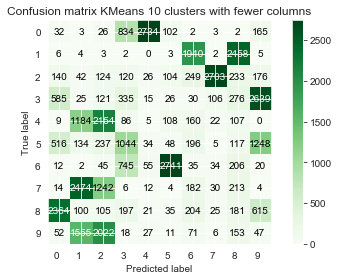

In [97]:
# Plot non-normalized confusion matrix
class_names_y=unique_labels(y)
plot_confusion_matrix(y, y_pred_KMeans_fr, classes=class_names_y,
                      title='Confusion matrix KMeans 10 clusters with fewer columns',
                      cmap=plt.cm.Greens)
plt.show()

In [122]:
correct = 0
for i in range(len(X_fr)):
    predict_me = X_fr.iloc[i].values
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = Kmeans_fr.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_fr)*100)

25.94458438287154


The results are not very good 25.9% acurate .... 

We are going to scale the features to be between 0 and 1. It is possible that with the different variations of the pixels,  the scale can help improve the prediction


In [118]:
from sklearn import preprocessing
X_fr_scaled = preprocessing.scale(X_fr)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


In [119]:
y_pred_KMeans_fr_scaled=Kmeans_fr.fit_predict(X_fr_scaled)

In [121]:
correct = 0
for i in range(len(X_fr_scaled)):
    if y_pred_KMeans_fr_scaled[i] == y[i]:
        correct += 1

print(correct/len(X_fr_scaled)*100)

29.65491183879093


You can see an instant 4% increase in the score.

k-means is sensitive to outliers and different results can occur if we change the ordering of the data

Despite many possible improvements, it is rare to find a dataset in which k-means is competitive with more advanced machine learning techniques 



------------------------------------------------------------------------------------------------------------------------



#### Now we are going to keep running the other algorithms as required in the assignment. 

1. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3)
2. Find the digits using Decision tree.
3. Find the digits using Random Forests.


### Find the digits using Random Forest 

Now we need to run our models and train them in finding *ALL DIGITS* which is different to Problem 1 ( finding 9s among all other labels  ) 


Now, we are going to train our models on y ( which includes all the labels ) 



In [26]:
#split the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

In [28]:
# Run Random Forest classifer  

RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
accuracy_RFC = RFC.score(X_test, y_test)
print("Accuracy of our prediction",accuracy_RFC)

Accuracy of our prediction 0.9375314861460957


In [29]:
y_pred_RFC_all=RFC.predict(X_test)

### Find the digits using Decision Tree 

With the previous data set ( including 2 labels ) we determined that a depth of 8 would maximize the accuracy of our tree. 

We are going to determine whats the best depth for the new labels ( all digits ) 


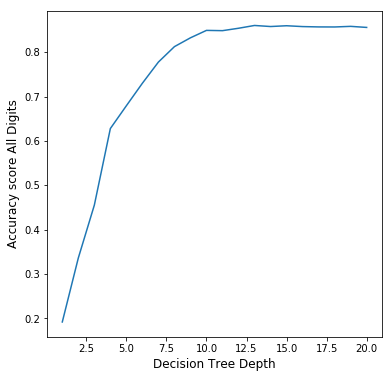

In [35]:

depth = np.linspace(1, 20, 20, endpoint=True)
accuracy_our_DTC_AllDigits =[]

for i in depth:
    DCT_all = DecisionTreeClassifier(max_depth=i)
    DCT_all.fit(X_train, y_train)
    score_i = DCT_all.score(X_test, y_test)
    accuracy_our_DTC_AllDigits.append(score_i)
    
fig = plt.figure(figsize=(6, 6))

plt.plot(depth, accuracy_our_DTC_AllDigits)

plt.xlabel(r"Decision Tree Depth", fontsize = 12)
plt.ylabel(r"Accuracy score All Digits", fontsize = 12)

plt.show()


Now we are going to run our training data set with depth=10 

In [36]:
DCT_all = DecisionTreeClassifier(criterion="entropy", max_depth=10)
DCT_all = DCT_all.fit(X_train,y_train)
accuracy_our_DTC_AllDigits = DCT_all.score(X_test, y_test)
print("General Accuracy of Decision Tree Classifier ALL Digits:",accuracy_our_DTC_AllDigits)

General Accuracy of Decision Tree Classifier ALL Digits: 0.8497481108312342


### Find the digits using K-Nearest neighbors for Minkowski metric of order (1, 2, 3).¶

Again, I couldn't run  Minkowski metric for p=3 all the other results are included in the paper 


In [37]:
KNN_1 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=1, metric='minkowski')
KNN_1.fit(X_train, y_train)

KNN_2 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2, metric='minkowski')
KNN_2.fit(X_train, y_train)


#KNN_3 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=3, metric='minkowski')
#KNN_3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
scoreKNN_1=KNN_1.score(X_test, y_test)
print("Accuracy Model KNN Minkowski with p=1",scoreKNN_1)

Accuracy Model KNN Minkowski with p=1 0.9565491183879093


In [139]:
scoreKNN_2=KNN_2.score(X_test, y_test)
print("Accuracy Model KNN Minkowski with p=2",scoreKNN_2)

Accuracy Model KNN Minkowski with p=1 0.9638539042821158


In [ ]:
#scoreKNN_3=KNN_3.score(X_test, y_test)
#print("Accuracy Model KNN Minkowski with p=3",scoreKNN_3)

-------------------------------------------------------------------------------


### In summary, let's print the table with the results for each run


In [44]:
model_names=['Decision Tree Classifier All Labels',
             'RandomForestClassifier All labels',
             'KNN Minkowski p=1 All Labels'#,
             #'KNN Minkowski p=2 2 Labels'
            ]
acc=[format(accuracy_our_DTC_AllDigits*100,'.2f'),format(accuracy_RFC*100,'.2f'),format(scoreKNN_1*100,'.2f')]
d={}

d={'Modelling Algorithm':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)
acc_frame



,Modelling Algorithm,Accuracy
0,Decision Tree Classifier All Labels,84.97
1,RandomForestClassifier All labels,93.75
2,KNN Minkowski p=1 All Labels,95.65



-------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------

### Lastly,  let's comment on any signiﬁcant diﬀerence between the results for the binary classiﬁer vs multi-class classiﬁers.


#### I am going to compare the accuracy of "finding the 9s" giving a multiclass vs. the binary classifier. 


Confusion matrix
[[723   1   3   8   3  15  10   4  11   9]
 [  0 842   7   3   0   3   8   6  10   5]
 [ 12  12 626  25  10   6  14  32  27  10]
 [  8   7  26 695   3  52   2  12  21  22]
 [  7   4  12   9 623   7  14   9  11  66]
 [ 21   8   6  49  11 549  20   7  28  15]
 [ 16   6  18   4  21  12 694   4   6   3]
 [  3  13  20  15   8   2   0 751   4  27]
 [ 10  18  11  41  10  15  18  14 591  20]
 [  4   5   7  13  28  14   6  36  30 653]]


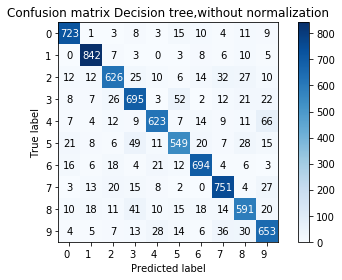

In [48]:
#y_pred_DTC_all=DCT_all.predict(X_test)
class_names = unique_labels(y_test)
plot_confusion_matrix(y_test, y_pred_DTC_all, classes=class_names,
                      title='Confusion matrix Decision tree,without normalization',
                      cmap=plt.cm.Blues)
plt.show()

Confusion matrix
[[766   0   4   0   3   2   5   1   4   2]
 [  0 871   3   3   3   0   0   1   2   1]
 [  4   5 725  10   5   0   6   4  11   4]
 [  3   4  19 773   3  19   1   5  16   5]
 [  1   1   5   3 717   4   3   1   3  24]
 [  8   0   2  37   4 647   7   0   6   3]
 [  8   1   1   0   3  10 757   1   3   0]
 [  1   3   7   0  17   4   0 796   2  13]
 [  5   5  12  17  10  16   2   8 667   6]
 [  6   3   4   5  18   7   2  16  10 725]]


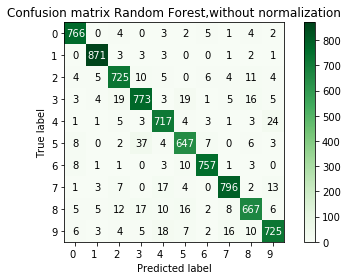

In [33]:
class_names = unique_labels(y_test)
plot_confusion_matrix(y_test, y_pred_RFC_all, classes=class_names,
                      title='Confusion matrix Random Forest,without normalization',
                      cmap=plt.cm.Greens)
plt.show()

Confusion matrix
[[780   0   3   0   0   2   0   1   0   1]
 [  0 883   1   0   0   0   0   0   0   0]
 [  7  21 723   1   0   0   1  18   2   1]
 [  3   8   7 801   0  13   1   5   9   1]
 [  0   9   0   0 729   0   2   0   0  22]
 [  1   1   1  16   0 674  14   3   1   3]
 [  4   2   0   0   1   3 774   0   0   0]
 [  1  10   1   0   0   0   0 818   0  13]
 [  6  16   4  16   5  23   5   4 659  10]
 [  4   6   1   6   4   2   1  17   1 754]]


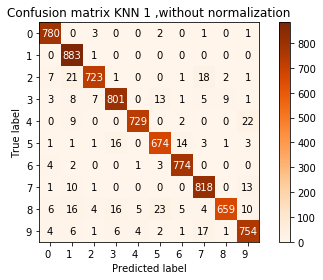

In [49]:
#y_pred_KNN_1=KNN_1.predict(X_test)
class_names = unique_labels(y_test)
plot_confusion_matrix(y_test, y_pred_KNN_1, classes=class_names,
                      title='Confusion matrix KNN 1 ,without normalization',
                      cmap=plt.cm.Oranges)
plt.show()


#### The intuition could point us to think that a binary classifier would perform better than a multi-class in labelling the rigth category, and in general, for finding the right label - it is true. 




![accuracy_multiclass.png](./markdowns/accuracy_multiclass.png)



![accuracy_binary.PNG](./markdowns/accuracy_binary.PNG)

#### However, the probability of labeling 9s correctly using Random Forest as a multiclass classifier is 91.1%, whereas with the binary classifier, we found that it was only 85.9% accurate in correctly finding 9s 

#### the probability of labeling 9s correctly using Decision Tree as a multiclass classifier is 82%, whereas with the binary classifier, we found it was only 77% accurate in correctly finding 9s 

#### Finally, the probability of labeling 9s correctly using KNN1 as a multiclass classifier is 94.7%, which is exaclty the same as the binary classifier. 


